# Inicialización de R

In [1]:
R.version.string

[1] "R version 4.0.4 (2021-02-15)"

## Instalación de paquetes

In [2]:
#install.packages("rgl", repos = "http://cran.rstudio.com/")
#install.packages("factoextra")
#install.packages("ggpubr")
#install.packages("dendextend")
#install.packages("photobiology")

# Conjunto de Datos: Medidas de Gobiernos contra COVID

Los datos pertenecen al proyecto de la Universidad de Oxford sobre las diferentes medidas que los gobiernos tomaron paraenfrentar COVID-19.

In [3]:
X <- read.csv(file = "data.csv")

## Preprocesamiento


Seleccionamos una fecha en específico. En este caso, usamos primer día del 2021. Notamos que ahora se tienen 281 observaciones.

In [4]:
library("dplyr")
X <- filter(X, Date == 20210101)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Nos limitamos a las variables de Políticas de contención y cierre.

In [5]:
# Renombramos las filas
rownames(X) <- paste(X$CountryName, X$RegionName)

X <- select(
    X,
    C1_School.closing, 
    C2_Workplace.closing,
    C3_Cancel.public.events,
    C4_Restrictions.on.gatherings,
    C5_Close.public.transport,
    C6_Stay.at.home.requirements,
    C7_Restrictions.on.internal.movement,
    C8_International.travel.controls
)

Omitimos los registros con valores faltantes. Nos quedamos con 276 observaciones.

In [6]:
library("photobiology")
X <- na.omit(X)
X

News at https://www.r4photobiology.info/



,C1_School.closing,C2_Workplace.closing,C3_Cancel.public.events,C4_Restrictions.on.gatherings,C5_Close.public.transport,C6_Stay.at.home.requirements,C7_Restrictions.on.internal.movement,C8_International.travel.controls
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aruba,0,0,1,3,0,2,0,1
Afghanistan,1,0,0,0,0,0,0,1
Angola,2,2,1,3,1,1,1,4
Albania,1,1,2,4,0,2,0,3
Andorra,1,2,2,4,1,0,0,1
United Arab Emirates,1,1,2,4,0,0,1,2
Argentina,3,2,2,4,2,2,2,3
Australia,1,3,2,4,1,2,2,4
Austria,3,3,2,4,1,2,1,3


Escalamos datos para un correcto uso de $k$-medias y Agrupamiento Jerárquico.

In [7]:
X <- as.data.frame(scale(X))

## Valores Numéricos

### Matriz de Covarianza

* Podemos notar que cada parea de variables tiene un índice de correlación no mayor a 0.5. 

* La variable __C8_International.travel.controls__ tiene los índices de correlación más bajos.

In [8]:
round(cor(X), 2)

,C1_School.closing,C2_Workplace.closing,C3_Cancel.public.events,C4_Restrictions.on.gatherings,C5_Close.public.transport,C6_Stay.at.home.requirements,C7_Restrictions.on.internal.movement,C8_International.travel.controls
C1_School.closing,1.00,0.51,0.47,0.43,0.23,0.42,0.38,-0.01
C2_Workplace.closing,0.51,1.00,0.56,0.50,0.39,0.43,0.41,0.12
C3_Cancel.public.events,0.47,0.56,1.00,0.64,0.30,0.34,0.35,0.01
C4_Restrictions.on.gatherings,0.43,0.50,0.64,1.00,0.23,0.37,0.29,0.06
C5_Close.public.transport,0.23,0.39,0.30,0.23,1.00,0.26,0.39,0.03
C6_Stay.at.home.requirements,0.42,0.43,0.34,0.37,0.26,1.00,0.41,-0.01
C7_Restrictions.on.internal.movement,0.38,0.41,0.35,0.29,0.39,0.41,1.00,0.19
C8_International.travel.controls,-0.01,0.12,0.01,0.06,0.03,-0.01,0.19,1.00


## Visualizacion de datos

Visualizamos datos en búsqueda de presencia de agrupamientos de puntos.

### Visualización en componentes principales

Las primeras dos componentes explican poco más del 55% de la varianza.

In [9]:
pca = prcomp(X, center = TRUE, scale = TRUE)
summary(pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     1.8498 1.0397 0.9550 0.86936 0.74937 0.72107 0.64699
Proportion of Variance 0.4277 0.1351 0.1140 0.09447 0.07019 0.06499 0.05232
Cumulative Proportion  0.4277 0.5628 0.6768 0.77133 0.84152 0.90651 0.95884
                           PC8
Standard deviation     0.57384
Proportion of Variance 0.04116
Cumulative Proportion  1.00000

Proyectamos observaciones en el plano de las componentes principales. Podemos notar que al rededor del 0 se acumulan más los puntos.

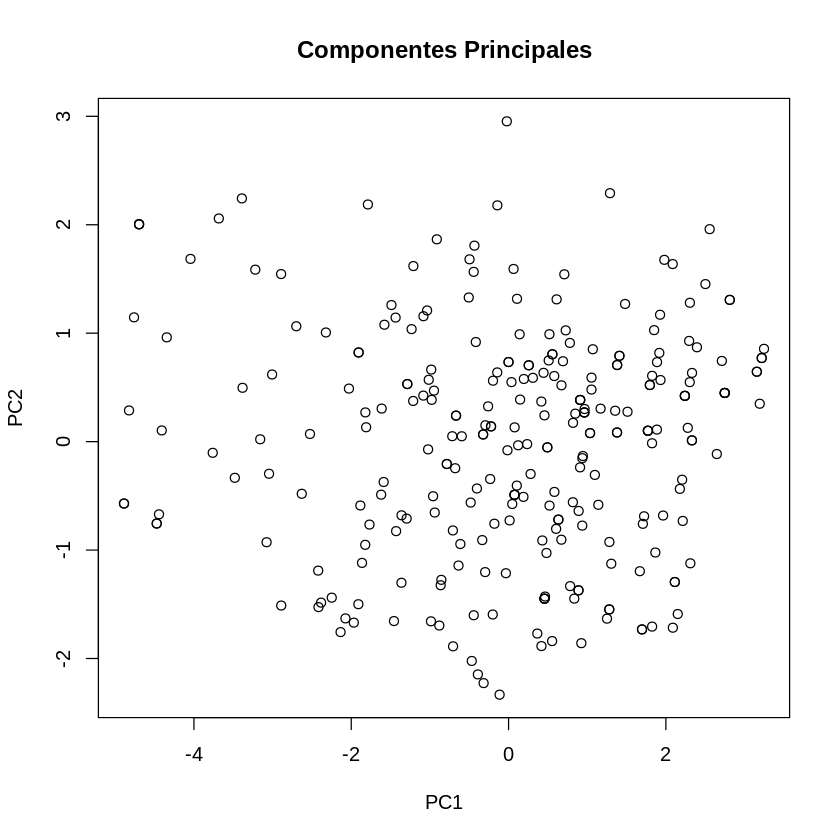

In [10]:
xlim <- range(pca$x[,1])
ylim <- range(pca$x[,2])
X_2d <- pca$x[,1:2]
# Proyeccion al plano de las componentes principales
plot(X_2d, xlim = xlim, ylim = ylim, main="Componentes Principales")

Observamos los nombres asociados a cada punto

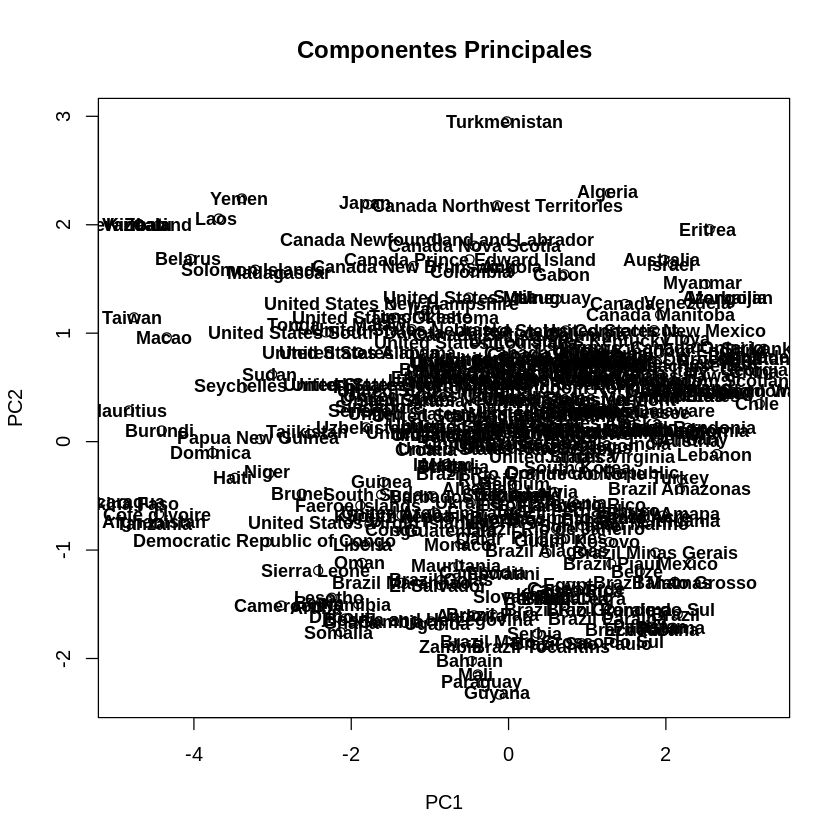

In [11]:
plot(X_2d, xlim = xlim, ylim = ylim, main="Componentes Principales")
text(X_2d, labels=rownames(X), cex=0.9, font=2)

# Clustering

## $k$-Medias

In [12]:
library("factoextra")
library("ggpubr")

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



Podemos determinar la cantidad óptima de centroides a utilizar a partir del __Método del Codo__, este método busca seleccionar la cantidad ideal de grupos a partir de la optimización de la WCSS (Within Clusters Summed Squares). Para ello, aplicaremos la función `kmeans` al conjunto de datos, variando en cada caso el valor de $k$, y acumulando los valores de WCSS obtenidos:

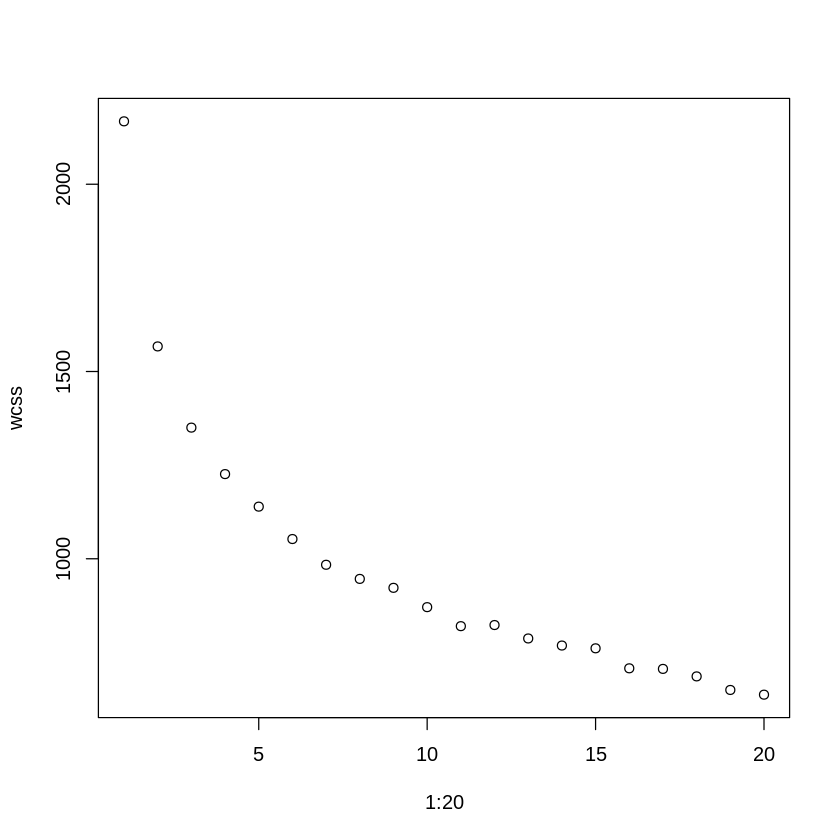

In [13]:
set.seed(1234)
wcss <- vector()
for(i in 1:20){
  wcss[i] <- sum(kmeans(X, i)$withinss)
}
plot(x=1:20, y=wcss)

A partir de $k=10$ podemos notar que ya no se producen variaciones importantes en WCSS, por lo que podemos elegir $k=10$ como número de clusters

### $k = 10$

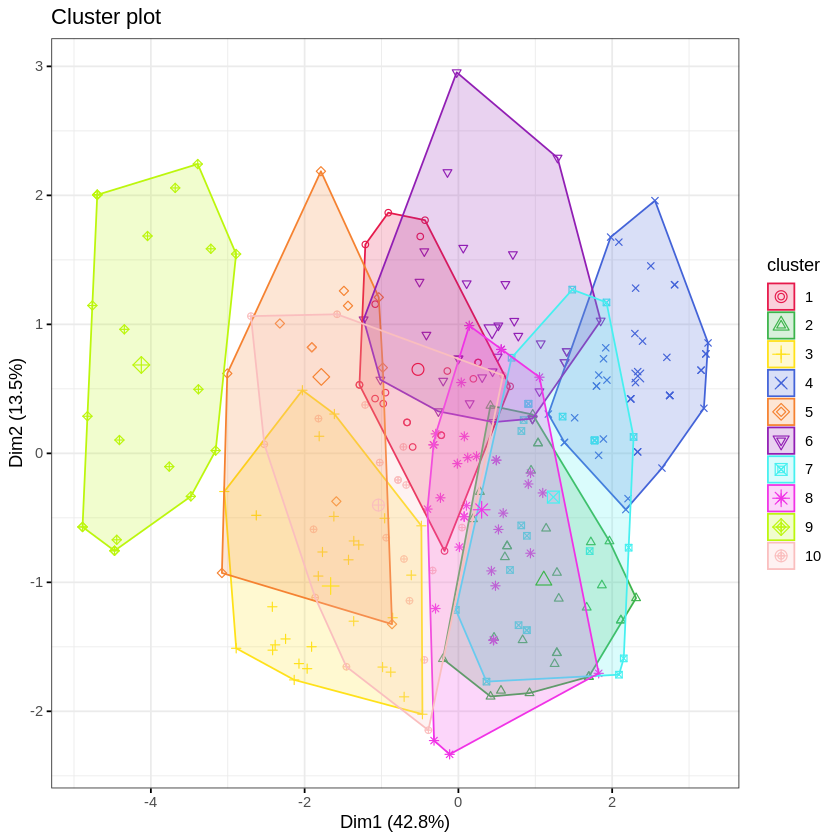

In [14]:
set.seed(321)
km_result <- kmeans(X, 10, nstart = 50)

fviz_cluster(km_result, data = X,
             palette = c(
                 '#e6194b', 
                 '#3cb44b', 
                 '#ffe119', 
                 '#4363d8', 
                 '#f58231', 
                 '#911eb4', 
                 '#46f0f0', 
                 '#f032e6', 
                 '#bcf60c',
                 '#fabebe'
            ), 
             geom = "point",
             ellipse.type = "convex", 
             ggtheme = theme_bw()
)

### $k = 5$

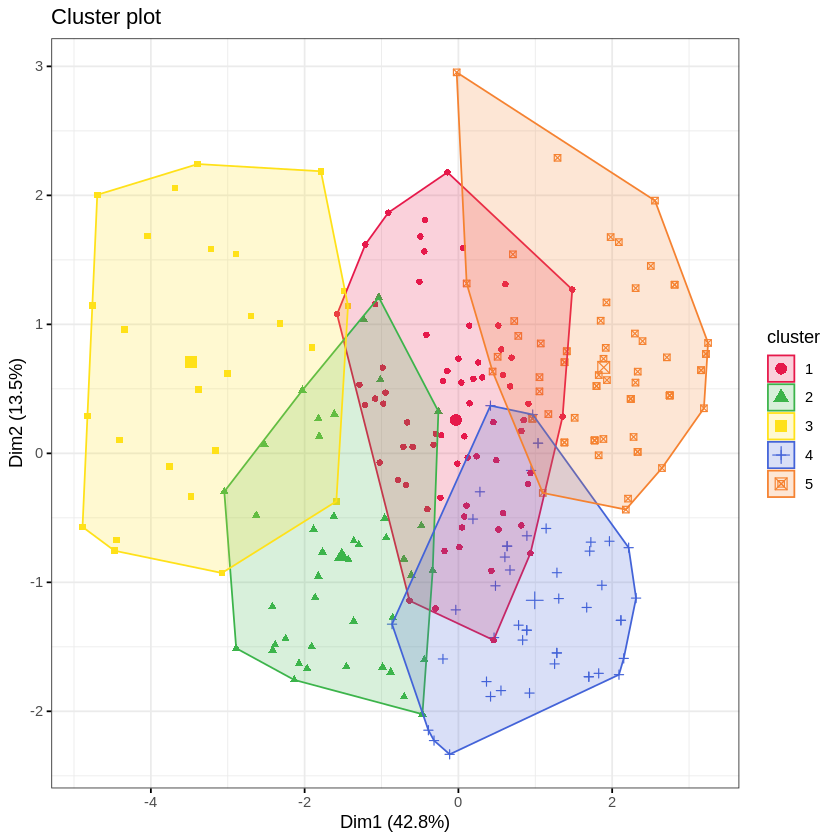

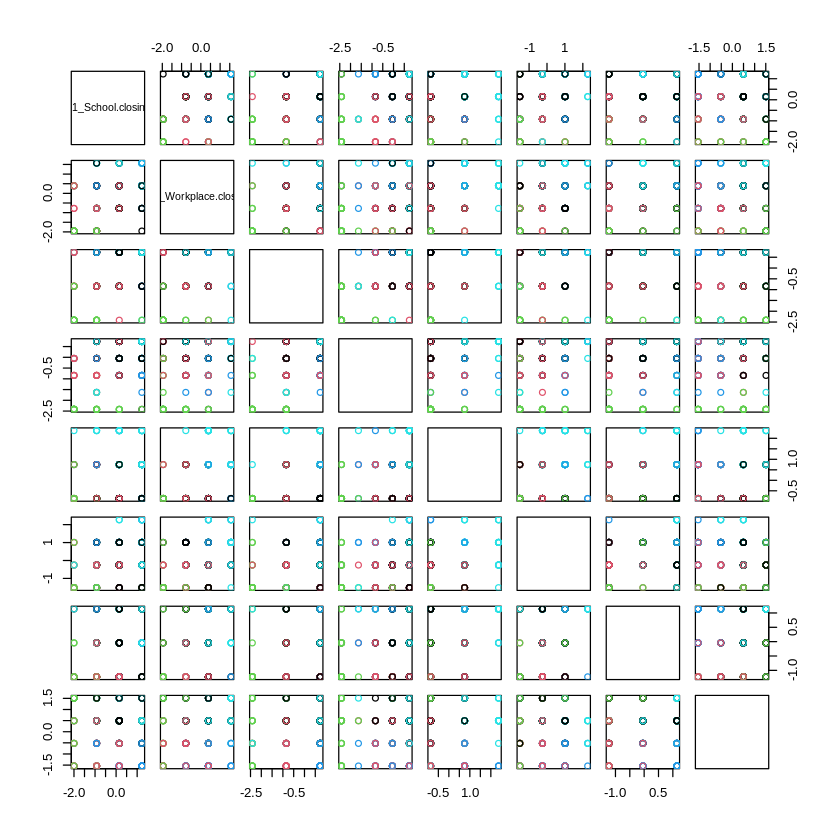

In [15]:
set.seed(321)
km_result <- kmeans(X, 5, nstart = 50)

fviz_cluster(km_result, data = X,
             palette = c(
                 '#e6194b', 
                 '#3cb44b', 
                 '#ffe119', 
                 '#4363d8', 
                 '#f58231'
            ), 
             geom = "point",
             ellipse.type = "convex", 
             ggtheme = theme_bw()
)
pairs(
    X, 
    c("C1_School.closing","C2_Workplace.closing"),
    col=km_result$cluster
)

## Agrupamiento Jerárquico

Elegimos medida de distancias y calculamos por parejas. En este caso usamos la Distancia Euclidiana

In [16]:
distances <- dist(X, method="euclidean")

Usamos el método del promedio 

In [17]:
h_average <-hclust(distances, method="average")

### $k = 10$

Elegimos el mismo numero de clusters que $k$-medias. En general se obtiene el mismo resultado salvo unos cuantos puntos que cambian de cluster.

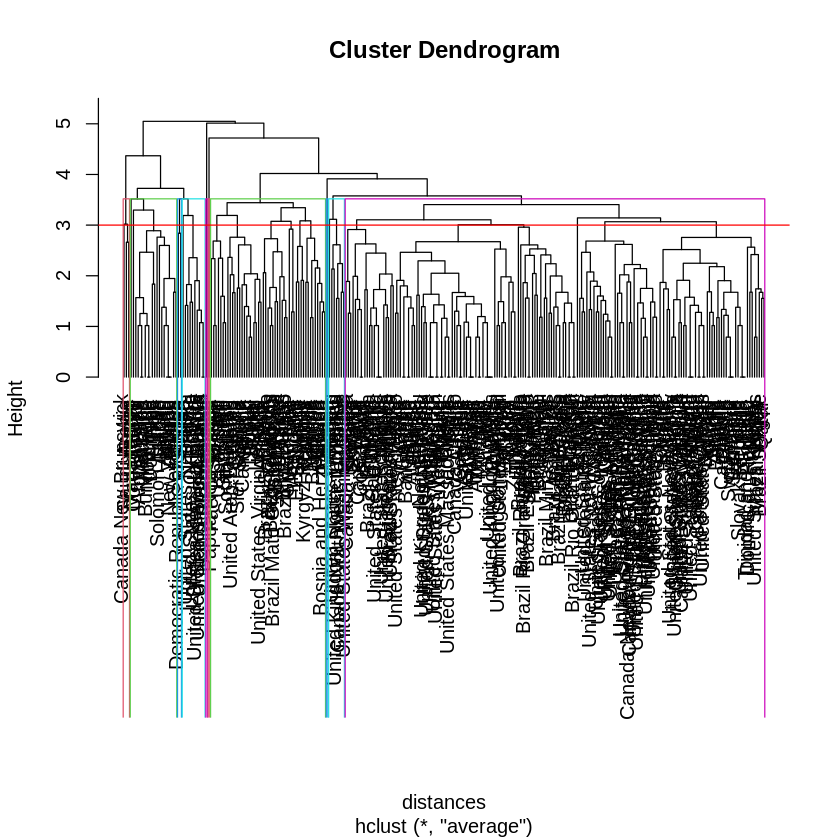

In [18]:
plot(h_average, hang=-1)
rect.hclust(h_average , k = 10, border = 2:6)
abline(h = 3, col = 'red')

# Concluisiones
